## Scenario

This is a dummy dataset containing profit and expenditure information of startups. Idea is to predict profit of the startup and find out the most relevant predictor or combination of predictors for predicting the profit using simple linear regression and multiple linear regression.<br/> 

## Plan

In this notebook, I will <br/>
-Implement simple linear regression and multiple linear regression<br/>
-Compute R2 and Adjusted R2 scores<br/>
-Use linear regression for predicting an outcome as well as determining relevant predictors.<br/>

## Dataset
The dataset being used is the "Startup Dataset" available on Kaggle (https://www.kaggle.com/harsh45/startups-dataset<br/>
The dataset has 50 rows and 5 columns. <br/>
The data represents profit made by startups in 3 US states. Each row stands for a startup and has information on the expenditure of the startup (R&D spend, Administration, Marketing Spend) and state of the startup.

### Importing libraries

In [1]:
import csv
import numpy as np
import pandas as pd

Reading data from the downloaded .csv file.

In [2]:
dataset_path = "50_Startups.csv"
df = pd.read_csv(dataset_path)

print('Shape of the dataset: ', df.shape)
df.head()   #first look at the data

Shape of the dataset:  (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


We have 5 columns and 50 rows in the dataset. Comparitively a smaller dataset, with State as a categorical column and the remaining 4 as numeric columns.

## Data Exploration
We can plot a histogram of the dataframe to understand the distributions of the continuous values.<br/>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B485DFA08>,
      dtype=object)

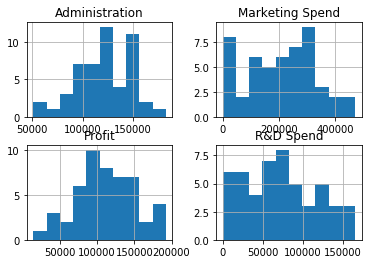

In [28]:
df.hist(bins = 10)

R&D is more evenly spread across all the bins whereas the others are not.

Lets compute the correlation matrix to get an understanding of the correlation between profit and different kinds of expenditure.<br/>



In [4]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


If we were to choose one variable for the simple linear regression it would be R&D spend. It has a high correlation with profit. Having a high correlation means that there is clearly a relationship between the two.

## Simple Linear Regression

Simple linear regression describes the case where we have a single predictor and a single outcome. We are interested in finding the "line of best fit" for the data. There are two constraints that guide us to the simple linear regression solution:

1. "line": characterized by a slope and intercept
2. "best fit": Minimizes the sum of squares and passes through the mean.

More formally, given some set of points (X, Y), we want to find a line of the form <br/>
$y = \beta_1 x + \beta_0$<br/>

That minimizes <br/>
$\sum(y-\hat{y})^2$<br/>

Through a bit of algebra, we find:<br/>
$\hat{\beta_1} = \dfrac{\sum((x_i-\bar{x})(y_i-\bar{y}))}{\sum(x_i - \bar{x})^2}$<br/>
$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$<br/>

It is really easy to implement linear regression using packages. To understand the logic and workings of linear regression better, I am going to implement the logic as a function. The simple_linear_regression() function in regression_utils.py is used for this purpose.<br/>

In [5]:
from regression_utils import simple_linear_regression

In [6]:
x1 = df["R&D Spend"]   #Predictor
y1 = df["Profit"]
b1, b0 = simple_linear_regression(x1, y1)

In [7]:
print("Slope(b1) = " + str(b1))
print("Intercept(b0) = " + str(b0))

Slope(b1) = 0.8542913709388089
Intercept(b0) = 49032.89914125214


### Prediction

Let's predict profit using the model created above

In [8]:
y = b0 + np.dot(x1,b1)
print('The profit for company that spends $50000 on R&D is: ', b0 + np.dot(50000,b1))

y = b0 + np.dot(x1,b1)
print('The profit for company that spends $75000 on R&D is: ', b0 + np.dot(75000,b1))

y = b0 + np.dot(x1,b1)
print('The profit for company that spends $100000 on R&D is: ', b0 + np.dot(100000,b1))

y = b0 + np.dot(x1,b1)
print('The profit for company that spends $200000 on R&D is: ', b0 + np.dot(200000,b1))

The profit for company that spends $50000 on R&D is:  91747.46768819258
The profit for company that spends $75000 on R&D is:  113104.75196166281
The profit for company that spends $100000 on R&D is:  134462.03623513304
The profit for company that spends $200000 on R&D is:  219891.17332901392


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.
This is also called Z-score Normalization. One advantage of using normalization is to put data on a common scale when it follows a normal distribution. <br/>
Based on previous graphs we know that the data isn't normally distributed so it might not be a good idea to normalize here.

In [9]:
from sklearn.preprocessing import StandardScaler
x1 = df["R&D Spend"].values.reshape(-1,1)
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
y1 = df["Profit"].values.reshape(-1,1)
b1, b0 = simple_linear_regression(x1, y1)

Let us check if the slope and intercept have changed

In [10]:
print("Slope(b1) = " + str(b1))
print("Intercept(b0) = " + str(b0))

Slope(b1) = 38819.78205265858
Intercept(b0) = 112012.63920000002


## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Let us perform multiple linear regression on the dataset with predictors as R&D Spend, Administration, Marketing Spend, State and outcome as Profit.

R&D Spend, Administration and Marketing Spend are continuous values whereas State contains discrete values. State can only take on the values New York, California or Florida. We need to perform one-hot encoding on State values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The code for performing one-hot encoding is provided below.

In [11]:
from regression_utils import multiple_regression

In [12]:
x2 = df[["R&D Spend","Administration","Marketing Spend"]]
one_hot = pd.get_dummies(df[["State"]])
x2 = pd.concat([x2,one_hot],axis=1)


y2 = df["Profit"].values
bhat = multiple_regression(x2, y2)

In [13]:
print(bhat)

[ 9.44921336e+04  1.19308930e+00  2.04709899e-01  2.99091114e-02
 -1.46924354e+05 -1.97962143e+05 -2.29026604e+05]


### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. We are going to implement the model using r-squared calculation in a user-defined function. We can obviously use library functions as well.

In [14]:
from regression_utils import calculate_r2
from regression_utils import predict

#### R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [15]:
x = df[["R&D Spend"]].values.reshape(-1,1)
x = scaler.fit_transform(x)
y = df[["Profit"]].values.reshape(-1,1)

bhat, b0 = simple_linear_regression(x, y)
pred = bhat*x1+b0
r2_1 = calculate_r2(y, pred)
print('The R2 score is: ', r2_1)

The R2 score is:  0.9465353160804392


#### R2 score for model with "Marketing Spend" as predictor and "Profit" as outcome

In [16]:
x = df[["Marketing Spend"]].values.reshape(-1,1)
x = scaler.fit_transform(x)
y = df[["Profit"]].values.reshape(-1,1)

bhat, b0 = simple_linear_regression(x, y)
pred = bhat*x1+b0
r2_2 = calculate_r2(y, pred)
print('The R2 score is: ', r2_2)

The R2 score is:  0.8958496631614128


#### R2 score for model with "Administration" as predictor and "Profit" as outcome

In [17]:
x = df[["Administration"]].values.reshape(-1,1)
x = scaler.fit_transform(x)
y = df[["Profit"]].values.reshape(-1,1)

bhat, b0 = simple_linear_regression(x, y)
pred = bhat*x1+b0
r2_3 = calculate_r2(y, pred)
print('The R2 score is: ', r2_3)

The R2 score is:  0.35026734469085263


#### R2 score for model with "State" as predictor and "Profit" as outcome

In [18]:
one_hot = pd.get_dummies(df[["State"]])
x = pd.concat([one_hot],axis=1)
y = df[["Profit"]].values

bhat = multiple_regression(x, y)
yhat = predict(x, bhat)
r2_4 = calculate_r2(y, yhat)
print('The R2 score is: ', r2_4)

The R2 score is:  -1.3655874280107976


Adding features one by one and compute R2 score of different models

#### R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [19]:
x = df[["R&D Spend"]]
y = df[["Profit"]]

bhat = multiple_regression(x, y)
yhat = predict(x, bhat)
r2_5 = calculate_r2(y, yhat)
print('The R2 score is: ', r2_5)

The R2 score is:  Profit    0.946535
dtype: float64


#### R2 score for model with "R&D Spend","Marketing Spend" as predictors and "Profit" as outcome

In [20]:
x = df[["R&D Spend", "Marketing Spend"]]
y = df[["Profit"]]

bhat = multiple_regression(x, y)
yhat = predict(x, bhat)
r2_6 = calculate_r2(y, yhat)
print('The R2 score is: ', r2_6)

The R2 score is:  Profit    0.95045
dtype: float64


#### R2 score for model with "R&D Spend","Marketing Spend","Administration" as predictors and "Profit" as outcome

In [21]:
x = df[["R&D Spend", "Marketing Spend", "Administration"]]
y = df[["Profit"]]

bhat = multiple_regression(x, y)
yhat = predict(x, bhat)
r2_7 = calculate_r2(y, yhat)
print('The R2 score is: ', r2_7)

The R2 score is:  Profit    0.950746
dtype: float64


#### R2 score for model with "R&D Spend","Marketing Spend","Administration","State" as predictors and "Profit" as outcome

In [22]:
x = df[["R&D Spend", "Marketing Spend", "Administration"]]
one_hot = pd.get_dummies(df[["State"]])
x = pd.concat([x,one_hot],axis=1)
y = df[["Profit"]]

bhat = multiple_regression(x, y)
yhat = predict(x, bhat)
r2_8 = calculate_r2(y, yhat)
print('The R2 score is: ', r2_8)

The R2 score is:  Profit   -1.418136
dtype: float64


Wait a minute, $R^2$ is always going up as we keep adding features? 

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors will always improve the predictive ability of your model, though it may not be meaningful.

That is to say, we are not necessarily interested in making a perfect prediciton of our data. If we were, we would always use all of the predictors available. Rather, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs nearly as well.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.
Using Adjusted R2 score, please give the most relevant combination of predictors in determining the profit of the startup.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

In [23]:
from regression_utils import calculate_adjusted_r2

#### Adjusted R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [24]:
n = np.shape(x)[0]
k = 1

calculate_adjusted_r2(r2_1, n, k)

0.9454214684987816

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend" as predictors and "Profit" as outcome

In [25]:
n = np.shape(x)[0]
k = 2

calculate_adjusted_r2(r2_2, n, k)

0.8914177339342388

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend","Administration" as predictors and "Profit" as outcome

In [26]:
n = np.shape(x)[0]
k = 3

calculate_adjusted_r2(r2_3, n, k)

0.30789347586634297

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend","Administration","State" as predictors and "Profit" as outcome


In [27]:
n = np.shape(x)[0]
k = 4

calculate_adjusted_r2(r2_4, n, k)

-1.5758618660562016

"R&D Spend","Marketing Spend" turn out to be the best predictors with "Profit" as outcome